In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("C:\\Users\\Jyri\\Documents\\Koulu 2021\\SY21 Data Analysis\\Python\\Assignments\\TieliikenneAvoinData_5_14\\TieliikenneAvoinData_5_14.csv", encoding = 'unicode_escape', engine ='python', error_bad_lines=False, delimiter=';', usecols=["merkkiSelvakielinen", "ajoneuvoluokka","iskutilavuus","vaihteisto","sylintereidenLkm",'ensirekisterointipvm'])



C:\Users\Jyri\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# 1f, manual vs. automatic transmission
#What we want? Number of automatic and manual cars per year
#What we have? Transmission code (1 for manual and 2 for automatic) for every car
# and registration date

#Create a new variable, which takeas into accuount only vehicles with manual or automatic transmission
data_transmission = data[(data['vaihteisto'] == '1') | (data['vaihteisto'] == '2')].copy()

#Read year from registration date
data_transmission['year'] = pd.DatetimeIndex(data_transmission['ensirekisterointipvm']).year

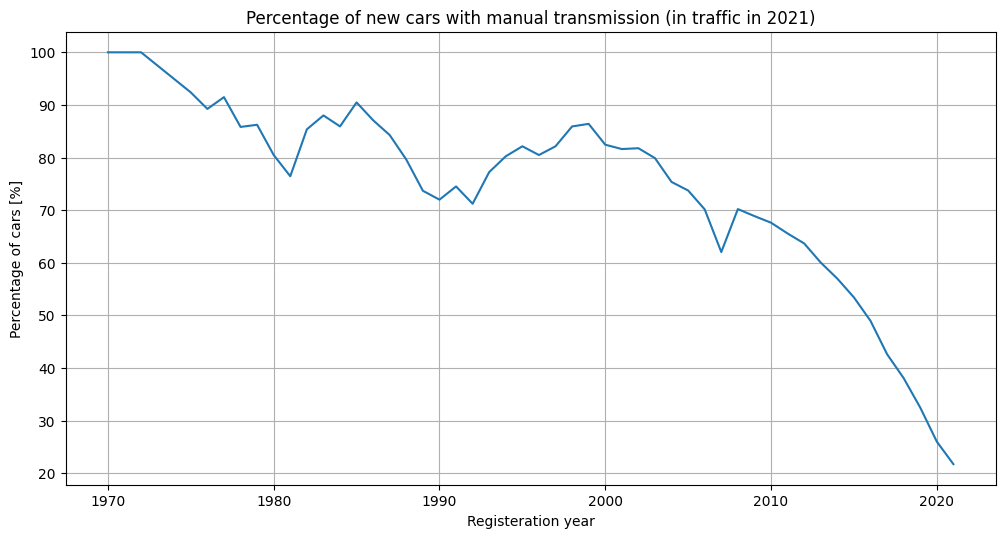

In [13]:
#Calculate the number of manual and automatic cars for every registeration year
transmission_results = (data_transmission.groupby(['year','vaihteisto']).size()).reset_index(name = 'count')


#Reform dataframe in way trhat every year appears only once 
# and count for automatic and manual cars are in their own columns

transmission_results = transmission_results.groupby(['year','vaihteisto'])['count'].aggregate('first').unstack().reset_index()


#Rename columns "1" and "2" to make data more readable
dict = {'year':'year','1':'manual','2':'automat'}
transmission_results.rename(columns=dict, inplace=True)

transmission_results['manual'] = transmission_results['manual'].fillna(0)
transmission_results['automat'] = transmission_results['automat'].fillna(0)
#calculate the fraction of manual cars
transmission_results['manual_fraction'] = transmission_results['manual'] /(transmission_results['manual'] + transmission_results['automat'])

plt.figure(figsize=(12,6), dpi =100)
plt.plot(transmission_results['year'],transmission_results['manual_fraction']*100)
plt.xlabel('Registeration year')
plt.ylabel('Percentage of cars [%]')
plt.grid(True)
plt.title('Percentage of new cars with manual transmission (in traffic in 2021)')
plt.show()